### Adapted from, Adaptive Random Search in the Ruby Programming Language

The Clever Algorithms Project: http://www.CleverAlgorithms.com  
(c) Copyright 2010 Jason Brownlee. Some Rights Reserved.   
This work is licensed under a Creative Commons Attribution-Noncommercial-Share Alike 2.5 Australia License.  

Adaptive Random Search, ARS, Adaptive Step Size Random Search, ASSRS, Variable Step-Size Random Search  

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# set seed for reproducibility
random.seed(1)

In [3]:
def objective_function(vector):
    return sum([value*value for value in vector])

In [4]:
def rand_in_bounds(minimum, maximum):
    return minimum+((maximum-minimum)*random.random())

In [5]:
def random_vector(dimensions):
    return [rand_in_bounds(lower_limit, upper_limit) for lower_limit, upper_limit in dimensions]

In [6]:
def large_step_size(i, step_size, s_factor, l_factor, iter_mult):
    if (i > 0) and (i % iter_mult == 0):
        return step_size * l_factor
    else:
        return step_size * s_factor
    # end if

In [7]:
def take_step(search_space, current_solution, step_size):
    dimensions = len(current_solution)
    position = list()
    for dim in range(dimensions):
        lower_limit, upper_limit = search_space[dim]
        soln_dim_value = current_solution[dim]
        minimum = max(lower_limit, soln_dim_value - step_size)
        maximum = min(upper_limit, soln_dim_value + step_size)
        position.append(rand_in_bounds(minimum, maximum))
    # end for
    return position

In [8]:
def take_steps(search_space, current, step_size, big_step_size):
    step = dict()
    step['vector'] = take_step(search_space, current['vector'], step_size)
    step['cost'] = objective_function(step['vector'])

    big_step = dict()
    big_step['vector'] = take_step (search_space, current['vector'], big_step_size)
    big_step['cost'] = objective_function (big_step['vector'])

    return step, big_step

In [9]:
class AdaptiveRandomSearch(object):
    def __init__(self,  max_iter, search_space, init_factor, s_factor, l_factor, iter_mult, max_no_impr):
        self.max_iter = max_iter
        self.search_space = search_space
        self.init_factor = init_factor
        self.s_factor = s_factor
        self.l_factor = l_factor
        self.iter_mult = iter_mult
        self.max_no_impr = max_no_impr
        self.candidate_solutions = list()
        self.best_solution = None

    def search(self):
        step_size = (self.search_space[0][1] - search_space[0][0]) * init_factor
        count = 0
        current_solution = dict()
        current_solution['vector'] = random_vector(search_space)
        current_solution['cost'] = objective_function(current_solution['vector'])
        self.best_solution = current_solution
        self.candidate_solutions.append(current_solution)
        for i in range(self.max_iter):
            big_step_size = large_step_size(i, step_size, self.s_factor, self.l_factor, self.iter_mult)
            step, big_step = take_steps(search_space, current_solution, step_size, big_step_size)
            if (step['cost'] <= current_solution['cost']) or (big_step['cost'] <= current_solution['cost']):
                if big_step['cost'] <= step['cost']:
                    step_size, current_solution = big_step_size, big_step
                else:
                    current_solution = step
                count = 0
                self.candidate_solutions.append(current_solution)
                self.best_solution = current_solution
            else:
                count += 1
                if count > self.max_no_impr:
                    count = 0
                    step_size = step_size / self.s_factor
            #print(" > iteration=%g, best=%g" % (i + 1, current_solution['cost']))
        return

In [10]:
def scatter_plot_of_solutions_simple(candidate_solutions, best_solution):
    print('\nA simple scatter plot')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    plt.scatter(x, y, marker='o', c='gray')
    plt.scatter(best_solution['vector'][0], best_solution['vector'][1],
                marker='X', c='green')
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [11]:
def scatter_plot_of_solutions_sized(candidate_solutions, best_solution):
    print('\nA simple scatter plot with size of point proportional to cost')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    colors = [random.random() for i in range(len(x))]
    plt.scatter(x, y, s=10*z, c=z, cmap='viridis')
    plt.colorbar()
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [12]:
def scatter_plot_of_solutions_3d(candidate_solutions, best_solution):
    print('\nA simple scatter plot in 3d')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    plt.figure(figsize=(15, 5))
    ax = plt.axes(projection='3d')
    ax.scatter(x, y, z, s=10*z, c=z, cmap='viridis')
    ax.set_title('Random search')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Cost')
    plt.show()

In [13]:
def scatter_plot_of_solutions_annotated(candidate_solutions, best_solution):
    print('\nA simple scatter plot with points annotated with their cost')
    x = np.array([candidate['vector'][0] for candidate in candidate_solutions])
    y = np.array([candidate['vector'][1] for candidate in candidate_solutions])
    z = np.array([candidate['cost'] for candidate in candidate_solutions])
    z_rounded = [np.round(val, decimals=2) for val in z]
    plt.figure(figsize=(15, 5))
    colors = [random.random() for i in range(len(x))]
    plt.scatter(x, y, s=10*z, c=z, cmap='viridis')
    for val, xi, yi in zip(z_rounded, x, y):
        plt.annotate(val, xy=(xi, yi), xytext=(-5, 5),
                     textcoords='offset points', ha='right', va='bottom',
                     arrowprops=dict(arrowstyle='simple',
                                     connectionstyle='arc3, rad=0'))
    plt.colorbar()
    plt.title('Random search')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()


A simple scatter plot


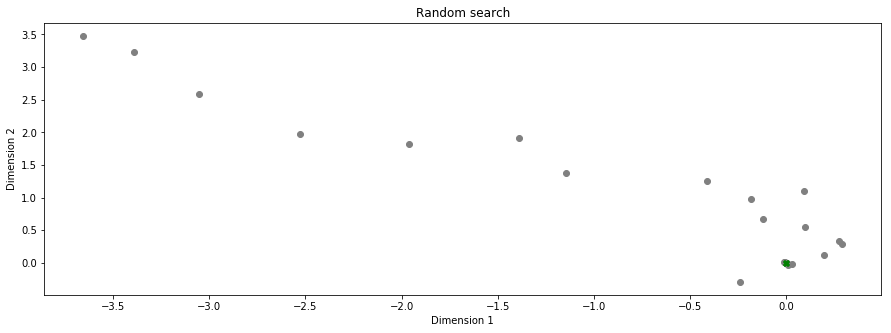


A simple scatter plot with size of point proportional to cost


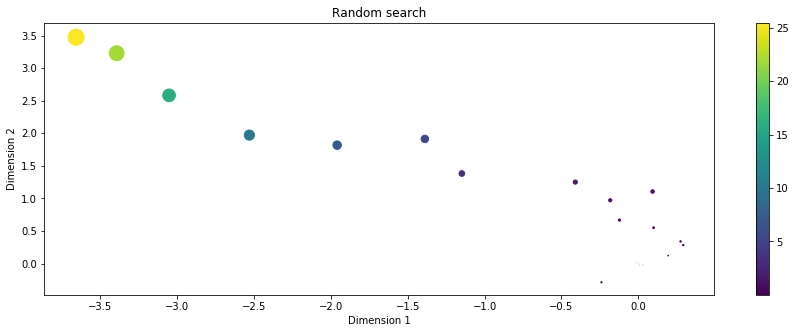


A simple scatter plot with points annotated with their cost


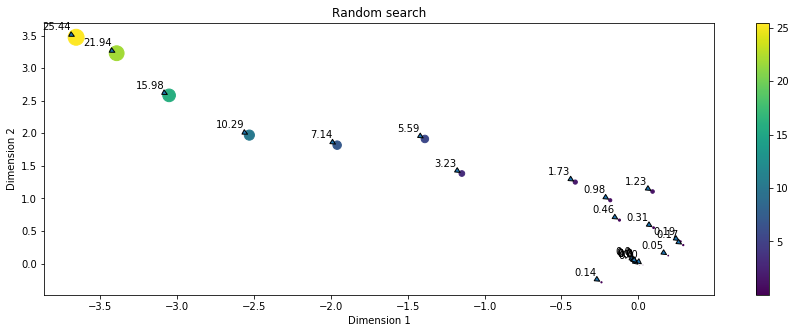


A simple scatter plot in 3d


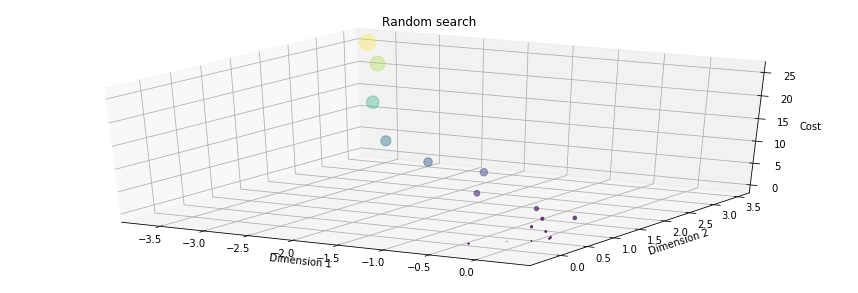

In [14]:
if __name__ == '__main__':
    # problem configuration
    problem_size = 2
    search_space = [[-5, +5] for i in range(problem_size)]
    # algorithm configuration
    max_iter = 1000
    init_factor = 0.05
    s_factor = 1.3
    l_factor = 3.0
    iter_mult = 10
    max_no_impr = 30
    # execute the algorithm
    adaptive_random_search = AdaptiveRandomSearch(max_iter, search_space, init_factor, s_factor, l_factor,
                                                  iter_mult, max_no_impr)
    adaptive_random_search.search()
    # print("Done. Best Solution: c=%g, v=%r" % (best['cost'], best['vector']))
    # print("sequence of steps:")
    # for step in step_sequence:
    #    coords = [round(item, 3) for item in step]
    #     print(coords)
    scatter_plot_of_solutions_simple(adaptive_random_search.candidate_solutions,
                                     adaptive_random_search.best_solution)
    scatter_plot_of_solutions_sized(adaptive_random_search.candidate_solutions,
                                    adaptive_random_search.best_solution)
    scatter_plot_of_solutions_annotated(adaptive_random_search.candidate_solutions,
                                        adaptive_random_search.best_solution)
    scatter_plot_of_solutions_3d(adaptive_random_search.candidate_solutions,
                                 adaptive_random_search.best_solution)